### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [130]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df_test = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df_test:
  for i, value in df_test[col].items():
    df_test.at[i, col] = f'{i}/{col}'

df_test

Col1       Col2       Col3       Col4
Row1  Row1/Col1  Row1/Col2  Row1/Col3  Row1/Col4
Row2  Row2/Col1  Row2/Col2  Row2/Col3  Row2/Col4
Row3  Row3/Col1  Row3/Col2  Row3/Col3  Row3/Col4

# Import Data

In [131]:
# Question 1: Create a function to import the data that allows a user to enter a path to a csv file
# and include a parameter that allows them to decide whether they want to display the number
# of rows and columns in the dataset. Also, allow the user to randomly sample the dataset
# size down to an inputted number of rows that is defaulted to 500. Always use a random seed = 1

def import_data(path, messages=True, sample=500):
    import pandas as pd
    import numpy as np

    # Import csv file    
    df = pd.read_csv(path)

    # Using random seed = 1
    np.random.seed(1)

    # Randomly sample the dataset
    df = df.sample(n=min(sample, len(df)))

    # Messages like these are useful when building out the pipeline initially
    # But they can be turned off once the pipeline is ready
    if messages: print(f'Number of rows and columns in dataset: {df.shape}')

    return df

In [132]:
# Question 2: Call that function using the dataset provided with this assignment. Sub-sample the dataset down
# to 500 rows using the parameter provided in the function you created. Specify the parameter
# needed to allow the function to print the shape of the DataFrame

df=import_data('tw_tweets_users_media.csv', messages=True, sample=500)

# Print the last five rows of the DataFrame
df.tail()

Number of rows and columns in dataset: (500, 25)


text  \
84     Curious about the Coronavirus? Where it came f...   
5220   Remember to take it one day at the time! 💐 🌷 🌹...   
22827  Death by Indifference... health inequalities s...   
5794   I’ve been taking treats to my Autistic kiddos ...   
4179   Children and adults living with autism may fin...   

       context_annotations_count  count_annotations  count_cashtags  \
84                             6                  0               0   
5220                           1                  0               0   
22827                          1                  1               0   
5794                           3                  0               0   
4179                           1                  0               0   

       count_hashtags  count_mentions  count_urls          created_at_tweet  \
84                  0               0           2  2020-01-31T15:45:10.000Z   
5220                5               0           1  2020-04-24T20:13:02.000Z   
22827               1               0           1  2021-07-19T13:04:16.000Z   
5794                1               0           1  2020-04-29T23:26:07.000Z   
4179                2               0           2  2020-04-15T16:15:13.000Z   

      lang  likes  ...              source  author_followers_count  \
84      en      0  ...  The Social Jukebox                   85885   
5220    en      1  ...     SocialBee.io v2                     241   
22827   en      3  ...     Twitter Web App                    1937   
5794    en     50  ...  Twitter for iPhone                    2519   
4179    en      1  ...      Hootsuite Inc.                     568   

       author_following_count author_tweet_count  author_listed_count  \
84                      70720                 54                  955   
5220                      563                 98                    7   
22827                    4985                 95                   34   
5794                     2564                 95                   38   
4179                      552                100                   15   

      author_verified  media_type  height  width  \
84              False       photo     606   1007   
5220            False       photo    1080   1080   
22827           False       photo    2304   4096   
5794            False       photo    2048   1538   
4179            False       photo     630   1200   

                                     preview_image_url  
84     https://pbs.twimg.com/media/EPnugCjX4AIn6tK.jpg  
5220   https://pbs.twimg.com/media/EWZRWklX0AI4Xv3.jpg  
22827  https://pbs.twimg.com/media/E6qT_H5WYAgnGc_.jpg  
5794   https://pbs.twimg.com/media/EWztfW_U8AEwuj4.jpg  
4179   https://pbs.twimg.com/media/EVqEndtXkAEzcQ_.jpg  

[5 rows x 25 columns]

# Explore Data

In [133]:
# Question 3: Create a function to calculate the following univariate properties: data type, number of missing values,
# number of unique values, min, median, max, mode, mean, standard deviation, and skewness. These metrics
# should be summarized in a table as demonstrated in the chapter. However, do not include any measures other
# than those listed here. Create the function so that the appropriate metrics will be only calculated for the
# correct data types: categorical or numeric as demonstrated in the chapter example.

# Also print out a countplot for every categorical or binary (only two values) feature. To keep this simple,
# do now calculate histograms for each numeric feature (although that would normally be a good idea). You can
# choose the exact display formats for both the univariate properties and visualizations. There is an example
# in the chapter of this type of function. If you copy that example, you will need to remove the histogram
# loop. In addition, you'll need to remove any metrics calculated in the function from the book that aren't
# required for this question.

def univariate(df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    df_output = pd.DataFrame(columns=['type', 'missing', 'unique', 'min', 'median',
                                    'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
    # Features that apply to all dtypes
        type = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        mode = df[col].mode()[0]

        if pd.api.types.is_numeric_dtype(df[col]):
            # Features for numeric only
            min = df[col].min()
            median = df[col].median()
            max = df[col].max()
            mean = df[col].mean()
            std = df[col].std()
            skew = df[col].skew()
            df_output.loc[col] = [type, missing, unique, min, median, max, mode,
                                round(mean, 2), round(std, 2), round(skew, 2)]
            if unique <= 2:
                sns.countplot(data=df, x=col)
                plt.title(f'Countplot of {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.show()


        else:
            df_output.loc[col] = [type, missing, unique, '-', '-', '-',
                                mode, '-', '-', '-']
            sns.countplot(data=df, x=col)
            plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
            plt.title(f'Countplot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()
        
    return df_output




/Users/graceogden/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/graceogden/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/graceogden/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/graceogden/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128159 (\N{HEART DECORATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/graceogden/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128

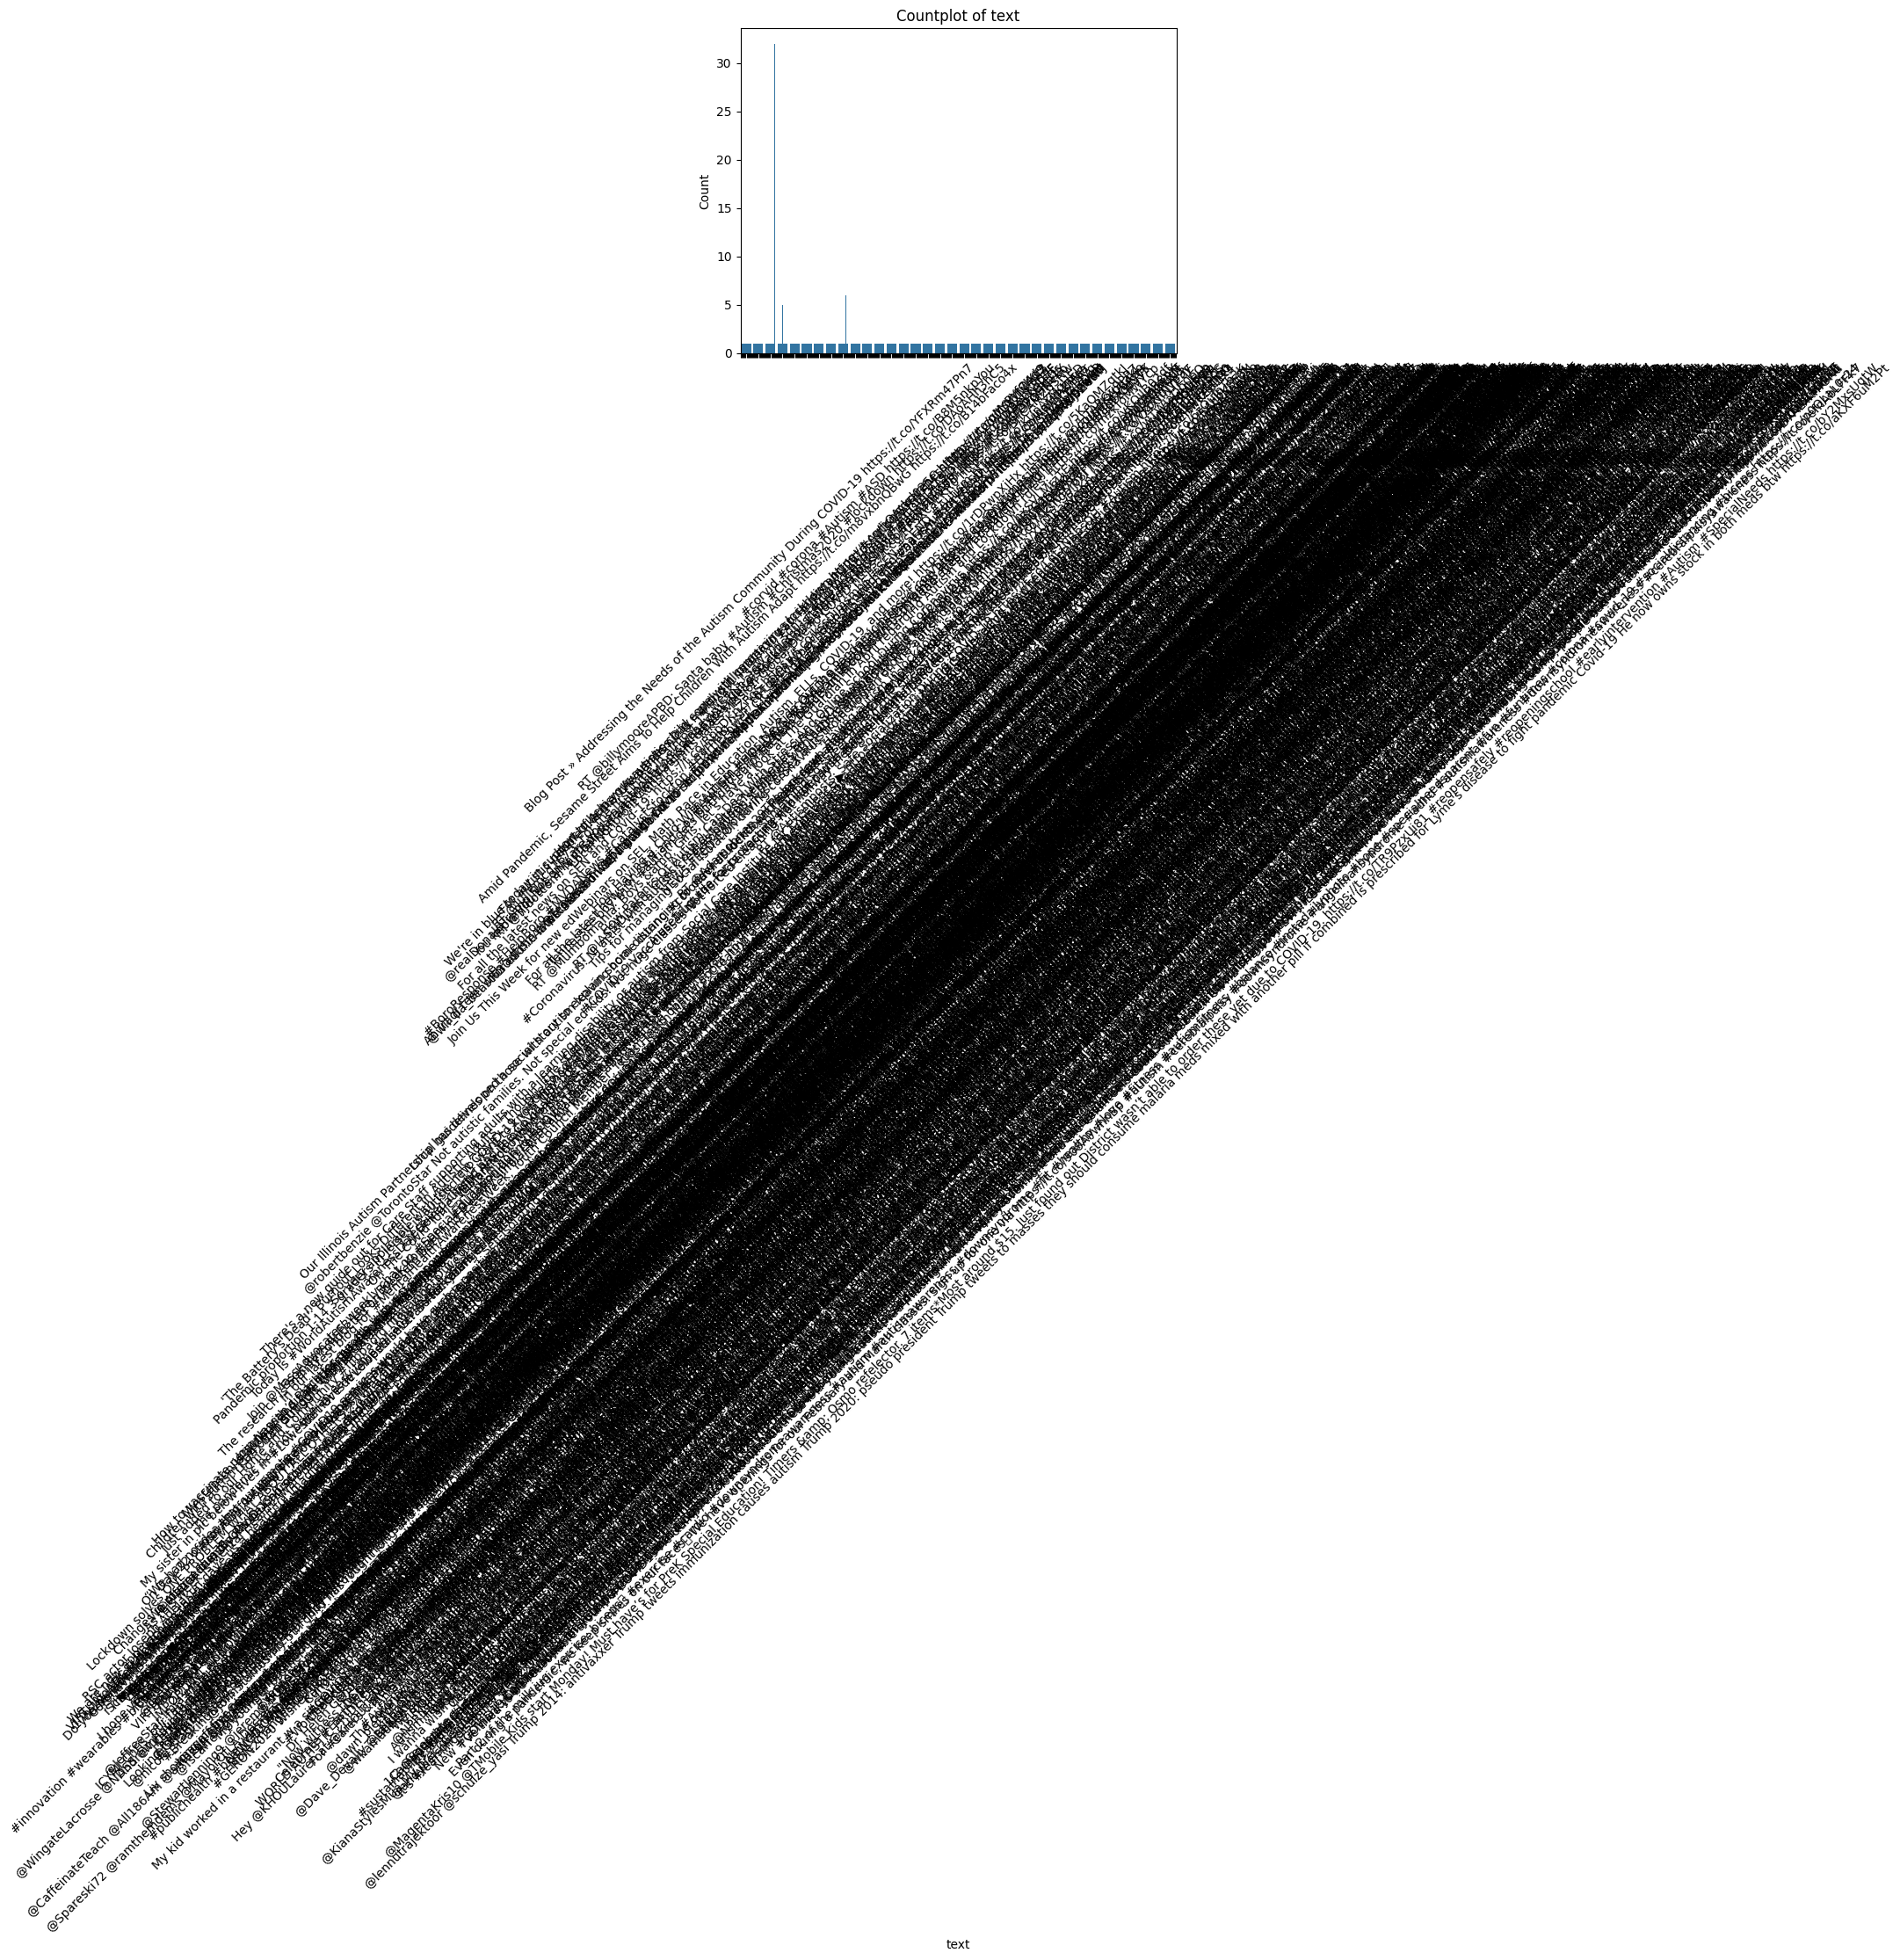

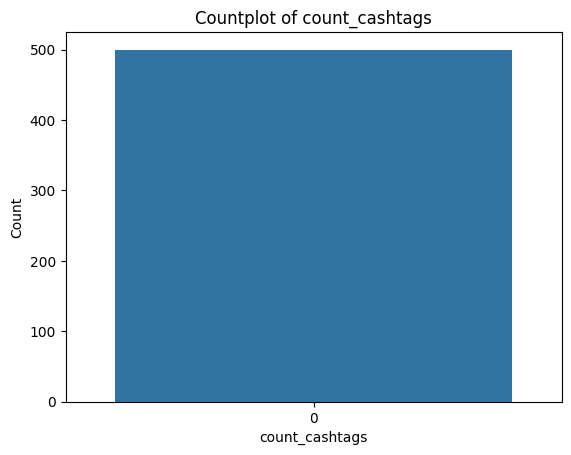

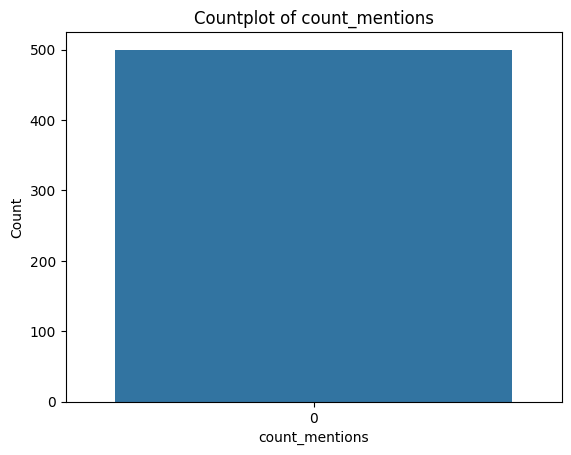

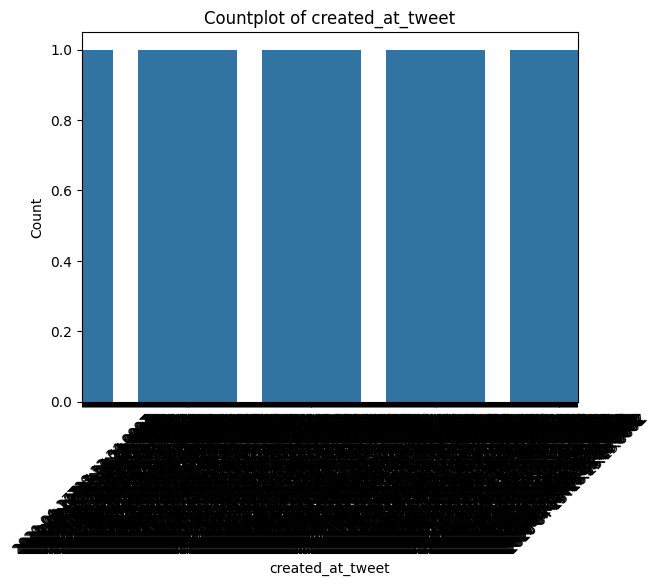

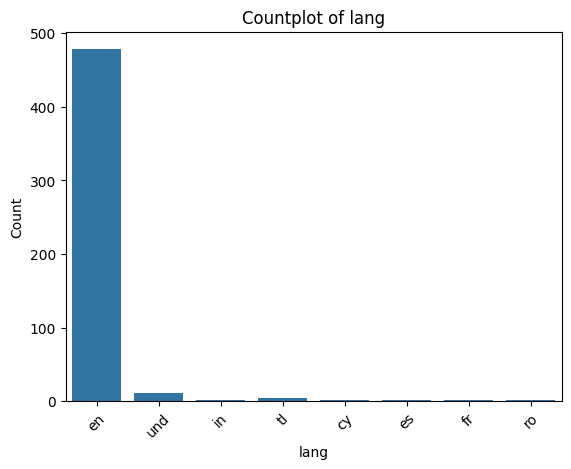

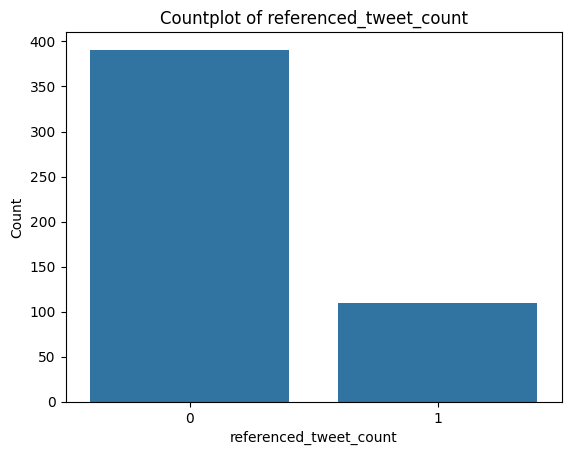

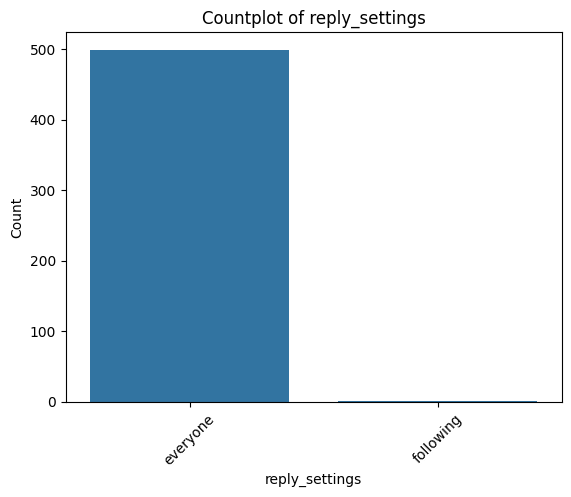

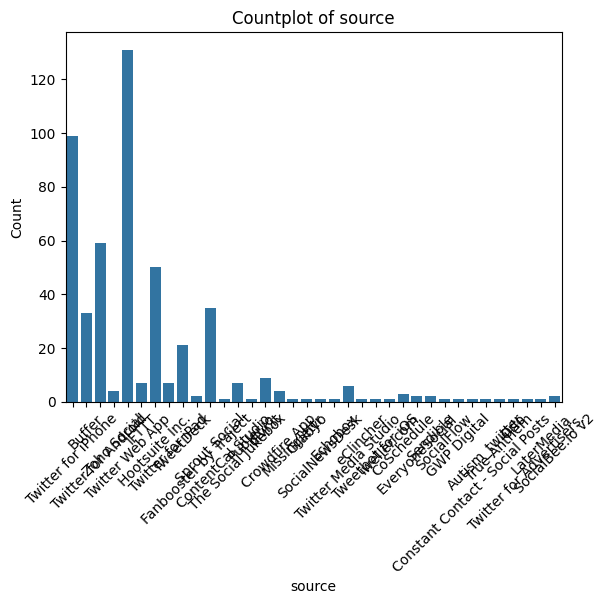

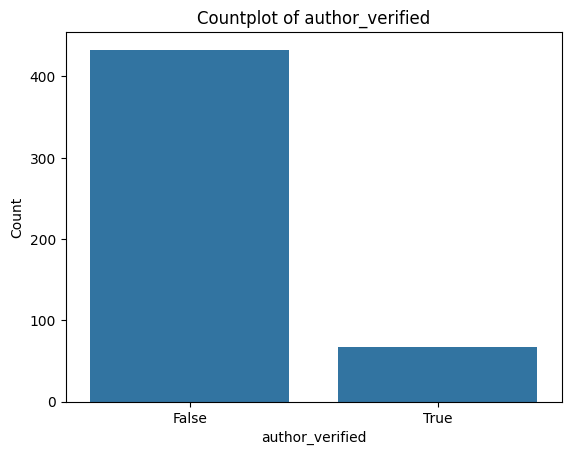

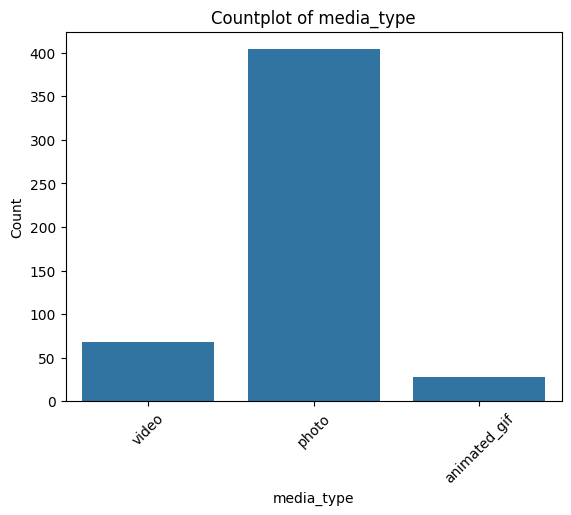

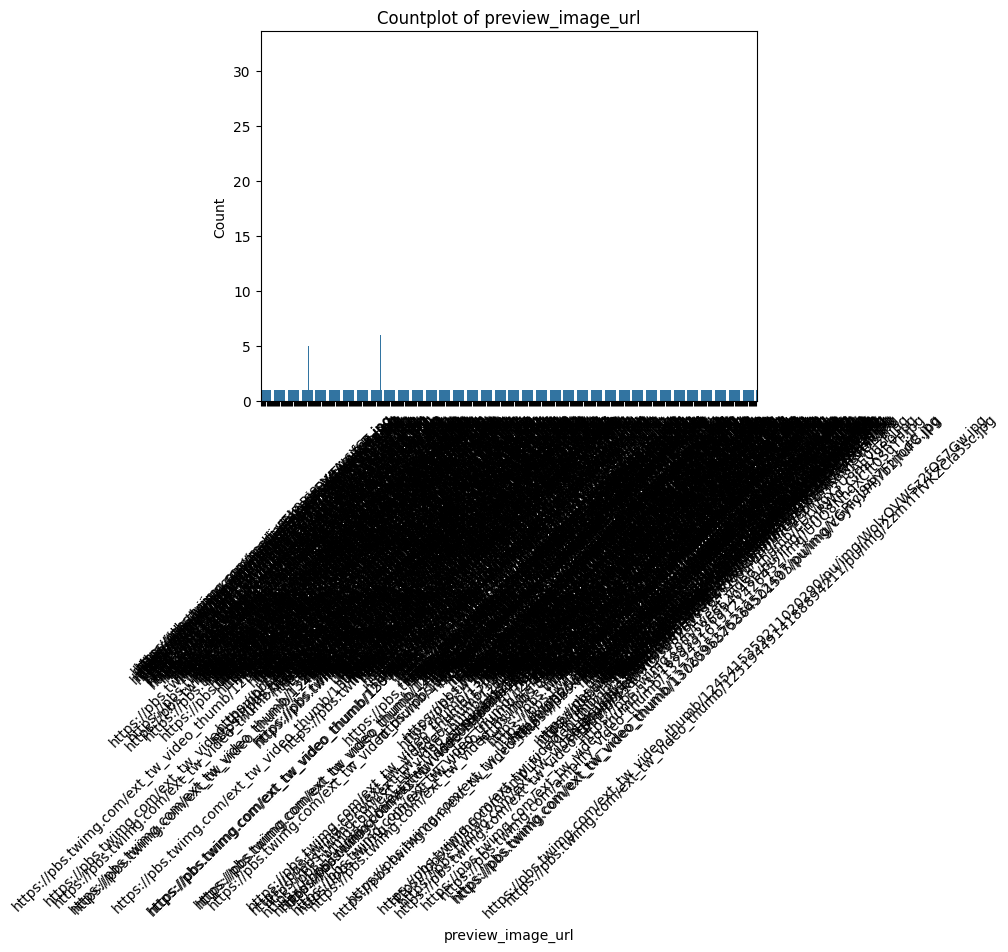

type  missing  unique    min  median     max  \
text                       object        0     460      -       -       -   
context_annotations_count   int64        0      16      0     1.0      20   
count_annotations           int64        0       7      0     0.0       6   
count_cashtags              int64        0       1      0     0.0       0   
count_hashtags              int64        0      21      0     1.0      25   
count_mentions              int64        0       1      0     0.0       0   
count_urls                  int64        0       4      1     2.0       4   
created_at_tweet           object        0     500      -       -       -   
lang                       object        0       8      -       -       -   
likes                       int64        0      54      0     1.0     764   
quotes                      int64        0       9      0     0.0      20   
referenced_tweet_count      int64        0       2      0     0.0       1   
replies                     int64        0      16      0     0.0      32   
reply_settings             object        0       2      -       -       -   
retweets                    int64        0      37      0     1.0    2958   
source                     object        0      36      -       -       -   
author_followers_count      int64        0     387      0  1842.0  709916   
author_following_count      int64        0     385      0  1185.0   70720   
author_tweet_count          int64        0      83     13    99.0  296037   
author_listed_count         int64        0     156      0    26.0    6793   
author_verified              bool        0       2  False     0.0    True   
media_type                 object        0       3      -       -       -   
height                      int64        0     237     99   720.0    4096   
width                       int64        0     187    220  1007.0    4267   
preview_image_url          object        0     460      -       -       -   

                                                                        mode  \
text                       RT @juliemcd1875: For the first time,in almost...   
context_annotations_count                                                  1   
count_annotations                                                          0   
count_cashtags                                                             0   
count_hashtags                                                             0   
count_mentions                                                             0   
count_urls                                                                 2   
created_at_tweet                                    2020-01-31T15:45:10.000Z   
lang                                                                      en   
likes                                                                      0   
quotes                                                                     0   
referenced_tweet_count                                                     0   
replies                                                                    0   
reply_settings                                                      everyone   
retweets                                                                   0   
source                                                       Twitter Web App   
author_followers_count                                                190107   
author_following_count                                                  3353   
author_tweet_count                                                       100   
author_listed_count                                                        0   
author_verified                                                        False   
media_type                                                             photo   
height                                                                  1280   
width                                                                    720   
preview_image_url         

In [134]:
# Question 4: Call the function you created using the 500 row sample of data you imported
univariate(df)

# Data Preparation

In [135]:
# Question 5: Based on the univariate analyses in the prior step, it appears that we need to drop a few features and bin some categorical
# values of some of the features. First, the features "text" and "preview_image_url" contain too many unique values to dummy
# code for modeling. Let's drop those. Also, notice from the countplot generated for the "reply_settings" feature that almost
# every record is set to "everyone". In other words, this feature will not be very reliable when it comes time to make
# predictions. Lastly, we have four options for labels that would indicate how 'viral' each post is: quotes, likes, replies,
# and retweets. To simplify the label, let's create a new label that is the sum of each of these outcomes and then drop each
# of those individual labels.

# Create a function that will drop those three features specified, sum together the four label options into a new label called,
# 'reach', and then drop the four labels. This type of function will be used only for this dataset since it is so specific to
# these features. In other words, you do not need to give this function logic to make these decisions dynamically. Just make
# it manually perform those steps and return the updated DataFrame:

# 1. Drop 'text', 'preview_image_url', 'reply_settings'
# 2. Generate 'reach' as the sum of 'likes', 'quotes', 'replies', and 'retweets'
# 3. Drop 'likes', 'quotes', 'replies', and 'retweets'

# Run this function in the full pipeline (i.e. after importing the entire dataset) and then print out all remaining feature
# names one-at-a-time.

def drop(df):

    # Drop irreleven/missing/nonunique columns
    df.drop(['text', 'preview_image_url', 'reply_settings'], axis=1, inplace=True)

    # Generate 'reach' as the sum of 'likes', 'quotes', 'replies', and 'retweets'
    df['reach'] = df['likes'] + df['quotes'] + df['replies'] + df['retweets']

    # Drop 'likes', 'quotes', 'replies', and 'retweets'
    df.drop(['likes', 'quotes', 'replies', 'retweets'], axis=1, inplace=True)

    return df

df=import_data('tw_tweets_users_media.csv', messages=True, sample=500)

drop(df)
for col in df.columns:
    print(col)

Number of rows and columns in dataset: (500, 25)
context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
created_at_tweet
lang
referenced_tweet_count
source
author_followers_count
author_following_count
author_tweet_count
author_listed_count
author_verified
media_type
height
width
reach


In [136]:
# Question 6: Next, create a function that will bin the groups within categorical features that don't make up at least n percent of the
# rows in the dataset. There is an example in the chapter of this type of function.

def bin_categories(df, features=[], cutoff=0.05, replace_with='Other', messages=True):
  import pandas as pd

  if len(features) == 0: features = df.columns

  for feat in features:
    if feat in df.columns:
      if not pd.api.types.is_numeric_dtype(df[feat]):
        other_list = df[feat].value_counts()[df[feat].value_counts() / df.shape[0] < cutoff].index
        df.loc[df[feat].isin(other_list), feat] = replace_with
        if messages: print(f'{feat} has been binned by setting {other_list} to {replace_with}')
    else:
      if messages: print(f'{feat} not found in the DataFrame provided. No binning performed')

  return df

In [137]:
# Question 7: Now, let's execute the function you created in the prior step within the entire pipeline using 5 percent as the cutoff value
# for the minimum group percent of rows that are required to keep the value without binning it to "Other". Save that binned
# version of the entire dataset as a new DataFrame. Then, call the function again with the entire dataset using a cutoff
# parameter of 2 percent and save that as a new DataFrame separate from the 5 percent version. Do this again for a
# version where anything under 1 percent is binned. We are going to compare these three datasets later just like we
# did in the chapter. Please note that you will probably need to use a .copy() of your DataFrame when you create the
# three different versions of the dataset to avoid memory issues. For example:

# new_2_percent_df = function_name(df.copy(), cutoff=0.02)

# The pipeline order should look like this pseudocode:

# import entire dataset
df=import_data('tw_tweets_users_media.csv', messages=True, sample=500)

# generate reach and drop the features specified in that function
drop(df)
for col in df.columns:
    print(col)

# save a new df based on 1 percent binning
df_1_percent=bin_categories(df.copy(), cutoff=0.01) 

# save a new df based on 2 percent binning
df_2_percent=bin_categories(df.copy(), cutoff=0.02) 

# save a new df based on 5 percent binning
df_5_percent=bin_categories(df.copy(), cutoff=0.05) 

# Once you've run the functions in the pipeline and saved the three new versions of the dataset based on the 1, 2, and 5
# percent binning, print out the value counts of the "source" feature from each of those three DataFrames
# Print out the value counts of the "source" feature from each of the three DataFrames
print("\nValue counts for 'source' in 1 percent binning:")
print(df_1_percent['source'].value_counts())

print("\nValue counts for 'source' in 2 percent binning:")
print(df_2_percent['source'].value_counts())

print("\nValue counts for 'source' in 5 percent binning:")
print(df_5_percent['source'].value_counts())


Number of rows and columns in dataset: (500, 25)
context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
created_at_tweet
lang
referenced_tweet_count
source
author_followers_count
author_following_count
author_tweet_count
author_listed_count
author_verified
media_type
height
width
reach
created_at_tweet has been binned by setting Index(['2020-04-17T19:12:34.000Z', '2020-04-24T08:15:06.000Z',
       '2021-04-02T07:35:00.000Z', '2020-04-15T14:00:00.000Z',
       '2020-08-14T08:54:17.000Z', '2021-06-04T09:57:07.000Z',
       '2020-11-30T00:01:03.000Z', '2020-05-20T20:35:04.000Z',
       '2020-05-21T09:14:31.000Z', '2020-05-04T09:05:23.000Z',
       ...
       '2020-08-11T21:45:14.000Z', '2020-07-26T17:12:21.000Z',
       '2020-04-02T10:59:05.000Z', '2020-05-23T06:06:47.000Z',
       '2021-05-24T15:58:58.000Z', '2020-11-29T09:00:12.000Z',
       '2020-03-07T23:59:03.000Z', '2020-08-02T16:50:05.000Z',
       '2020-04-30T23:18:08.000Z', '2020-04-15

In [138]:
# Question 8: The final cleaning step we need to perform is to convert the date field 'created_at_tweet' into usable features. You
# may remember doing something similar in a prior assignment. This time, we are going to create a function to accomplish
# this task. Make a function that will convert a date column into five new columns for: hour of the day, day of the week,
# day of the month, month of the year, and year. You should delete the original date so that it does not get included in
# in the modeling phase. You should also convert the weekday into a categorical data type. If you return the weekday in text
# form (e.g. Monday, Tuesday) then this will happen automatically. If you create it as a 0-6 or 1-7 feature, then you will
# have to manually cast it to an 'object'.

def parse_date(df, features=[], days_since_today=False, drop_date=True, messages=True):
  import pandas as pd
  from datetime import datetime as dt

  for feat in features:
    if feat in df.columns:
      df[feat] = pd.to_datetime(df[feat])
      df[f'{feat}_year'] = df[feat].dt.year
      df[f'{feat}_month'] = df[feat].dt.month
      df[f'{feat}_day'] = df[feat].dt.day
      df[f'{feat}_dayName'] = df[feat].dt.day_name()
      df[f'{feat}_hour'] = df[feat].dt.hour

      if days_since_today: df[f'{feat}_days_until_today'] = (dt.today() - df[feat]).dt.days
      if drop_date: df.drop(columns=[feat], inplace=True)
    else:
      if messages: print(f'{feat} does not exist in the DataFrame provided. No work performed')

  return df

In [139]:
# Question 9: Call the date function you created in the prior step to convert 'created_at_tweet' into three new columns. However,
# to make our pipeline more efficient we should add this function BEFORE we create the three different binned version
# based on the 1, 2, and 5 percent cutoffs. So, execute the entire pipeline here with the date function in the correct
# place:

# import entire dataset
# generate reach and drop the features specified in that function
# call the date function to convert 'created_at_tweet' into three new columns and drop the original column
# save a new df based on 1 percent binning
# save a new df based on 2 percent binning
# save a new df based on 5 percent binning

# import entire dataset
df=import_data('tw_tweets_users_media.csv', messages=True)

# generate reach and drop the features specified in that function
drop(df)
for col in df.columns:
    print(col)

# Convert 'created_at_tweet' to year, month, date, day, and hour
parse_date(df, features=['created_at_tweet'])

# save a new df based on 1 percent binning
df_1_percent=bin_categories(df.copy(), cutoff=0.01) 

# save a new df based on 2 percent binning
df_2_percent=bin_categories(df.copy(), cutoff=0.02) 

# save a new df based on 5 percent binning
df_5_percent=bin_categories(df.copy(), cutoff=0.05) 

print("\nNumber of features")
print("df_1_percent:", len(df_1_percent.columns))
print("df_2_percent:", len(df_2_percent.columns))
print("df_5_percent:", len(df_5_percent.columns))


Number of rows and columns in dataset: (500, 25)
context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
created_at_tweet
lang
referenced_tweet_count
source
author_followers_count
author_following_count
author_tweet_count
author_listed_count
author_verified
media_type
height
width
reach
lang has been binned by setting Index(['tl', 'in', 'es', 'cy', 'fr', 'ro'], dtype='object', name='lang') to Other
source has been binned by setting Index(['Zoho Social', 'Crowdfire App', 'CoSchedule', 'Sendible',
       'EveryoneSocial', 'SocialBee.io v2', 'Fanbooster by Traject', 'Grabyo',
       'GWP Digital', 'LaterMedia', 'Twitter for Advertisers.', 'Orlo',
       'True Anthem', 'Autism_twitter', 'Constant Contact - Social Posts',
       'SocialFlow', 'Echobox', 'ContentCal Studio', 'Publer.io',
       'iweller.com', 'Tweetbot for iΟS', 'eClincher', 'Missinglettr',
       'SocialNewsDesk'],
      dtype='object', name='source') to Other
media_type has been 

# Modeling and Evaluation

In [140]:
# Question 10: Now it is time for modeling. Create a function that works just like the fit_cv_regression() example
# in the book. Note that this means you will also need to either a) also copy in the functions required to generate the
# X and y datasets and perform dummy coding from the book, or b) write the code to perform those steps within the revised
# fit_cv_regression() function you create here. You will not need to address missing data or a train/test split since
# we are just going to use the cross-validation technique in this function.

# Modify this function so that rather than specifying a family of algorithms to try (e.g. 'linear', 'ensemble', or
# 'other'), it simply tries all of the following algorithms: Ridge, LassoLars, RandomForestRegressor, and
# GradientBoostingRegressor. It should print out the R2 scores if the user who calls the function indicates through
# a parameter (e.g. messages=True). It should also return a trained model based on the highest R squared score.

# Create Xandy function
def Xandy(df, label):
    import pandas as pd
    y = df[label]
    X = df.drop(columns=[label])
    return X, y

# Dummy Code columns function
def dummy_code(X):
    import pandas as pd
    X = pd.get_dummies(X, drop_first=True)
    return X

# Cross valudate function
def fit_cv_regression(df, k, r, label, repeat=True, random_state=1, messages=True):
        from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
        import pandas as pd
        from numpy import mean
        
        # Prepare for modeling
        X, y = Xandy(df, label)
        X = dummy_code(X)
        
        # Create cross-validator object
        if repeat:
          cv = RepeatedKFold(n_splits=k, n_repeats=r, random_state=random_state)
        else:
          cv = KFold(n_splits=k, random_state=random_state, shuffle=True)

        # Ridge, LassoLars, RandomForestRegressor, and GradientBoostingRegressor
        
        # Ridge & LassoLars
        from sklearn.linear_model import Ridge, LassoLars
        ridge = Ridge(random_state=random_state)
        lasso = LassoLars(random_state=random_state)
        ridge_score = mean(cross_val_score(ridge, X, y, scoring='r2', cv=cv, n_jobs=-1))
        lasso_score = mean(cross_val_score(lasso, X, y, scoring='r2', cv=cv, n_jobs=-1))
        
        # RandomForestRegressor & GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
        forest = RandomForestRegressor(random_state=random_state)
        gradi = GradientBoostingRegressor(random_state=random_state)
        forest_score = mean(cross_val_score(forest, X, y, scoring='r2', cv=cv, n_jobs=-1))
        gradi_score = mean(cross_val_score(gradi, X, y, scoring='r2', cv=cv, n_jobs=-1))
        
        if messages: 
          print('R2', '{: <25}'.format(type(ridge).__name__), round(ridge_score, 4))
          print('R2', '{: <25}'.format(type(lasso).__name__), round(lasso_score, 4))
          print('R2', '{: <25}'.format(type(forest).__name__), round(forest_score, 4))
          print('R2', '{: <25}'.format(type(gradi).__name__), round(gradi_score, 4))
          
        if ridge_score > lasso_score and ridge_score > forest_score and ridge_score > gradi_score:
          return ridge.fit(X, y)
        elif lasso_score > ridge_score and lasso_score > forest_score and lasso_score > gradi_score:
          return lasso.fit(X, y)
        elif forest_score  > ridge_score and forest_score > lasso_score and forest_score > gradi_score:
          return forest.fit(X, y)
        else:
            return gradi.fit(X, y)

In [141]:
# Question 11: Let's call your revised version of fit_cv_regression() (or whatever you decided to name it) once for each of our three
# binned versions of the dataset based on the 1, 2, and 5 percent cutoffs that also includes the functions that drop
# the features we can't use and generates the 'reach' label and the function to convert dates. However, because we have
# over 24k records, these pipelines could take a while. Therefore, let's sub-sample the dataset down to 1000 records.
# Use a random seed of 1 everywhere it is needed in the fit_cv_regression function including the cross-validator
# object and each algorithm. Specify a repeated k fold cross-validation with 5 folds and 5 repeats.

# The pipeline should look something like this:



# import a sub-sample of dataset including only 1000 records (remember that random seed = 1)
df=import_data('tw_tweets_users_media.csv', messages=False, sample=1000)

# generate reach and drop the features specified in that function
drop(df)

# call the date function to convert 'created_at_tweet' into three new columns and drop the original column
parse_date(df, features=['created_at_tweet'], messages=False)

# save a new df based on 1 percent binning
df_1_percent=bin_categories(df.copy(), cutoff=0.01, messages=False)

# save a new df based on 2 percent binning
df_2_percent=bin_categories(df.copy(), cutoff=0.02, messages=False)

# save a new df based on 5 percent binning
df_5_percent=bin_categories(df.copy(), cutoff=0.05, messages=False) 

# fit_cv_regression based on 5 folds with 5 repeats using the 5 percent binned DataFrame and print out all R2 values
print('\n df_5_percent')
fit_cv_regression(df_5_percent, k=5, r=5, label='reach', repeat=True, random_state=1, messages=True)

# fit_cv_regression based on 5 folds with 5 repeats using the 2 percent binned DataFrame and print out all R2 values
print('\n df_2_percent')
fit_cv_regression(df_2_percent, k=5, r=5, label='reach', repeat=True, random_state=1, messages=True)

# fit_cv_regression based on 5 folds with 5 repeats using the 1 percent binned DataFrame and print out all R2 values
print('\n df_1_percent')
fit_cv_regression(df_1_percent, k=5, r=5, label='reach', repeat=True, random_state=1, messages=True)




 df_5_percent
R2 Ridge                     0.5034
R2 LassoLars                 0.4985
R2 RandomForestRegressor     0.9441
R2 GradientBoostingRegressor 0.9482

 df_2_percent
R2 Ridge                     0.4983
R2 LassoLars                 0.4964
R2 RandomForestRegressor     0.9433
R2 GradientBoostingRegressor 0.9495

 df_1_percent
R2 Ridge                     0.4934
R2 LassoLars                 0.4849
R2 RandomForestRegressor     0.9447
R2 GradientBoostingRegressor 0.9488


GradientBoostingRegressor(random_state=1)

In [142]:
# Question 12: Examine the 12 model fit scores from those three pipeline runs you performed in the last step. Identify the best model
# fit. Write a function (like the one in the book) to save a trained model based on the binned dataset (1, 2, or 5
# percent) and algorithm (Ridge, LassoLars, RandomForest, or GradientBoosting) that gives the highest R squared score.
# This function should use the pickle package to save the trained model.

# Rerun the entire pipeline using ONLY the binned version of the dataset AND algorithm that gives the highest model fit
# score. For example, if a LassoLars regression using the 2 percent binned dataset gives the highest R2, then store that
# model and save it as an exported file using the function you created called, 'saved_model.sav'. With this pipeline run,
# use the entire imported dataset with all 24k+ records. It will take a while, so test this first with a smaller dataset.
# Continue to use all of the other settings as specified in prior questions: random seed = 1 everywhere, 5 folds, 5 repeats

import pickle

def load_pickle(model, file_name):
  import pickle
  pickle.dump(model, open(file_name, "wb"))


def gradient_booster(df, k, r, label, repeat=True, random_state=1, messages=True):
  from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
  import pandas as pd
  from numpy import mean
  
  # Prepare for modeling
  X, y = Xandy(df, label)
  X = dummy_code(X)
  
  # Create cross-validator object
  if repeat:
    cv = RepeatedKFold(n_splits=k, n_repeats=r, random_state=random_state)
  else:
    cv = KFold(n_splits=k, random_state=random_state, shuffle=True)
  
  # RandomForestRegressor & GradientBoostingRegressor
  from sklearn.ensemble import GradientBoostingRegressor
  gradi = GradientBoostingRegressor(random_state=random_state)
  gradi_score = mean(cross_val_score(gradi, X, y, scoring='r2', cv=cv, n_jobs=-1))
  
  if messages: 
    print('R2', '{: <25}'.format(type(gradi).__name__), round(gradi_score, 4))
    
  return gradi.fit(X, y)
        


# import a sub-sample of dataset including only 1000 records (remember that random seed = 1)
df=import_data('tw_tweets_users_media.csv', messages=False, sample=1000)

# generate reach and drop the features specified in that function
drop(df)

# call the date function to convert 'created_at_tweet' into three new columns and drop the original column
parse_date(df, features=['created_at_tweet'], messages=False)

# save a new df based on 1 percent binning
df_1_percent=bin_categories(df.copy(), cutoff=0.01, messages=False)

# save a new df based on 2 percent binning
df_2_percent=bin_categories(df.copy(), cutoff=0.02, messages=False)

# save a new df based on 5 percent binning
df_5_percent=bin_categories(df.copy(), cutoff=0.05, messages=False) 

# fit_cv_regression based on 5 folds with 5 repeats using the 2 percent binned DataFrame and print out all R2 values
print('\n df_2_percent')
model = gradient_booster(df_2_percent, k=5, r=5, label='reach', repeat=True, random_state=1, messages=True)

load_pickle(model, file_name='saved_model.sav')


 df_2_percent
R2 GradientBoostingRegressor 0.9495


In [143]:
# Question 13: Finally, generate a function that will read the file with a saved model based on the path you pass into the function. Call
# the function and store the file you read into an object that you use to make an out-of-sample prediction using the following
# data:

# context_annotations_count                 6
# count_annotations                         2
# count_cashtags                            4
# count_hashtags                           25
# count_mentions                           12
# count_urls                                1
# referenced_tweet_count                    0
# author_followers_count                23367
# author_following_count                 5071
# author_tweet_count                       98
# author_listed_count                      50
# author_verified                       False
# height                                  550
# width                                   963
# created_at_tweet_hour                    16
# created_at_tweet_day                      1
# created_at_tweet_month                   11
# created_at_tweet_year                  2020
# created_at_tweet_weekday:            Sunday
# lang_en                                   0
# source:                     Twitter Web App
# media_type:                           photo

# HINT: After you read in the saved model file, access the .feature_names_in_ property to see what order the values go into the
# model so that you get the values above in the right order with dummy codes.

def load_predict(data, model_path):
    import pickle
    import pandas as pd

    # Load the stored model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Read the data into a DataFrame
    new_data = pd.DataFrame(data)

    # Reorder the columns to match the model's input order
    new_data = new_data[model.feature_names_in_]
        
    # Make predictions
    predictions = model.predict(new_data)

    return predictions

# Call the function

new_data = {
    'context_annotations_count': [6],
    'count_annotations': [2],
    'count_cashtags': [4],
    'count_hashtags': [25],
    'count_mentions': [12],
    'count_urls': [1],
    'referenced_tweet_count': [0],
    'author_followers_count': [23367],
    'author_following_count': [5071],
    'author_tweet_count': [98],
    'author_listed_count': [50],
    'author_verified': [False],
    'height': [550],
    'width': [963],
    'created_at_tweet_hour': [16],
    'created_at_tweet_day': [1],
    'created_at_tweet_month': [11],
    'created_at_tweet_year': [2020],
    'created_at_tweet_weekday_Sunday': [1],  # Dummy code weekday
    'lang_en': [1],  # Dummy code lang
    'source_Twitter Web App': [1],  # Dummy code source
    'media_type_photo': [1]  # Dummy code media_type
    }

predictions = load_predict(data=new_data, model_path='saved_model.sav')
print(predictions)


KeyError: "['source_Hootsuite Inc.', 'source_Other', 'source_Sprout Social', 'source_TweetDeck', 'source_Twitter for Android', 'source_Twitter for iPhone', 'source_dlvr.it', 'media_type_video', 'created_at_tweet_dayName_Monday', 'created_at_tweet_dayName_Saturday', 'created_at_tweet_dayName_Sunday', 'created_at_tweet_dayName_Thursday', 'created_at_tweet_dayName_Tuesday', 'created_at_tweet_dayName_Wednesday'] not in index"